#### DBSCAN demonstration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

In [2]:
# Create Dataset with Explicit Anomalies ---
X_moons, y_true_moons = make_moons(n_samples=300, noise=0.05, random_state=42)

# We'll create 25 anomalies in a wider box area
anomalies = np.random.uniform(low=-3, high=4, size=(25, 2))

# Combine the moons and the anomalies into one dataset
X = np.vstack([X_moons, anomalies])

# Create corresponding "ground truth" labels
# Moons are 0 and 1, we'll label our anomalies as 2
y_anomalies = np.full(anomalies.shape[0], 2)
y_true = np.hstack([y_true_moons, y_anomalies])


C:\Users\siona\AppData\Local\Temp\ipykernel_9708\1470538513.py:51: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax2.scatter(xy[:, 0], xy[:, 1], marker=marker, c=col, s=50, label=label, edgecolor='k', alpha=0.8)


Estimated number of clusters: 2
Estimated number of noise points (anomalies): 22


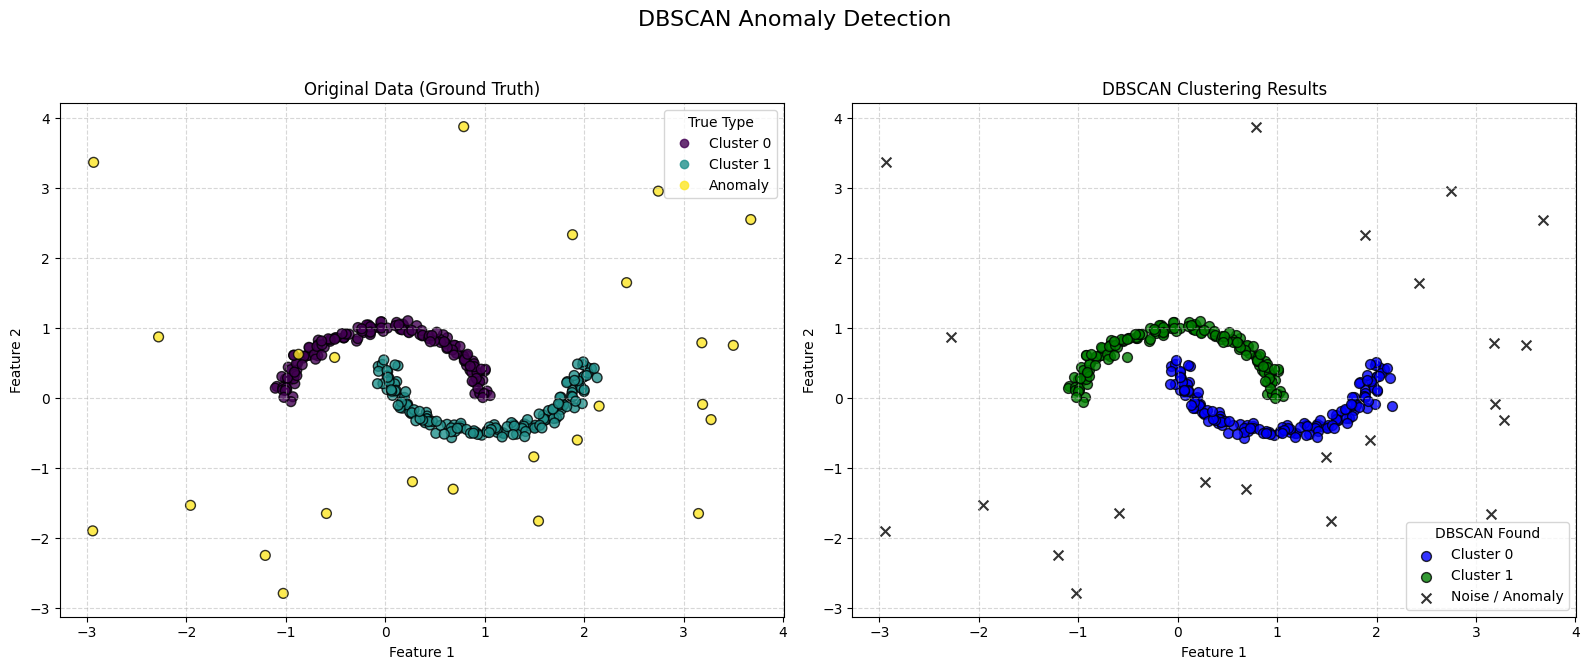

In [3]:
# Apply DBSCAN ---
# The 'eps' (epsilon) parameter is the most important.
# We set it to 0.2, which is large enough to connect the moon points
# but small enough to exclude the distant anomalies.
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Visualize the results (Side-by-Side)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Original Data with Anomalies ---
# We color this plot using our "ground truth" (y_true) labels

scatter1 = ax1.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=50, edgecolor='k', alpha=0.8)
ax1.set_title('Original Data (Ground Truth)')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.grid(True, linestyle='--', alpha=0.5)
# Create a legend for the ground truth
handles, _ = scatter1.legend_elements()
ax1.legend(handles, ['Cluster 0', 'Cluster 1', 'Anomaly'], title="True Type")


# DBSCAN Clustering Results ---
# This plot is colored by the 'labels' predicted by DBSCAN
unique_labels = set(labels)

# We map cluster 0 and 1 to specific colors, and -1 (Noise) to black
colors = {0: 'blue', 1: 'green', -1: 'black'}
markers = {0: 'o', 1: 'o', -1: 'x'}
plot_labels = {0: 'Cluster 0', 1: 'Cluster 1', -1: 'Noise / Anomaly'}

# iterate to plot each group separately so we can create a clear legend
for k in unique_labels:
    # Check if the label is one we defined
    if k not in colors:
        # Assign a default color if an unexpected cluster appears
        colors[k] = 'cyan'
        markers[k] = 's'
        plot_labels[k] = f'Cluster {k}'

    col = colors[k]
    marker = markers[k]
    label = plot_labels[k]
        
    class_mask = (labels == k)
    xy = X[class_mask]
    
    ax2.scatter(xy[:, 0], xy[:, 1], marker=marker, c=col, s=50, label=label, edgecolor='k', alpha=0.8)

ax2.set_title('DBSCAN Clustering Results')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')
ax2.legend(title="DBSCAN Found")
ax2.grid(True, linestyle='--', alpha=0.5)

# Show both plots
plt.suptitle('DBSCAN Anomaly Detection', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("dbscan_with_anomalies.png")

# Summary 
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points (anomalies): {n_noise}")